In [1]:
#!/usr/bin/python3.10

Prerequisites: pandas, xlrd, matplotlib, rpy2

# HSMC modelling

## Configuration
### It is assumed that this notebook is run from StructureAnalysis/sequence_analysis/tutorials

**Import OpenAlea packages**

In [2]:
from openalea.stat_tool import _stat_tool
from openalea.sequence_analysis import _sequence_analysis
from openalea.sequence_analysis.hidden_semi_markov import HiddenSemiMarkov
from openalea.sequence_analysis.simulate import Simulate
from openalea.sequence_analysis.data_transform import Thresholding

from openalea.stat_tool.data_transform import *
from openalea.stat_tool.cluster import Cluster
from openalea.stat_tool.cluster import Transcode, Cluster

import openalea.stat_tool.plot #import DISABLE_PLOT
from openalea.stat_tool.plot import DISABLE_PLOT
DISABLE_PLOT = False

import os

from openalea.stat_tool.output import plot, Plot

plot.DISABLE_PLOT = DISABLE_PLOT

from openalea.stat_tool.plot import get_plotter, mplotlib 

##### Check pandas version

In [3]:
# print pd.__version__

In [4]:
import xlrd
xlrd.__version__

'2.0.1'

For correct figure rendering

In [5]:
%matplotlib inline

##### Enabling R extensions

In [6]:
%load_ext rpy2.ipython

#####  Place variables in markdown outputs

In [7]:
from IPython.display import Markdown
from IPython.core.magic import register_cell_magic


@register_cell_magic
def markdown(line, cell):
    return Markdown(cell.format(**globals()))

## Loading and preparing data

In [8]:
import sys, os

In [9]:
sys.path

['/home/jdurand/devlp/Git/openalea/StructureAnalysis',
 '/home/jdurand/miniforge3/envs/openalea/lib/python310.zip',
 '/home/jdurand/miniforge3/envs/openalea/lib/python3.10',
 '/home/jdurand/miniforge3/envs/openalea/lib/python3.10/lib-dynload',
 '',
 '/home/jdurand/.local/lib/python3.10/site-packages',
 '/home/jdurand/miniforge3/envs/openalea/lib/python3.10/site-packages',
 '/home/jdurand/miniforge3/envs/openalea/lib/python3.10/site-packages/OpenAlea.SConsX-2.4.0-py3.9.egg',
 '/home/jdurand/devlp/Git/openalea/StructureAnalysis/stat_tool/src',
 '/home/jdurand/devlp/Git/openalea/StructureAnalysis/sequence_analysis/src',
 '/home/jdurand/miniforge3/envs/openalea/lib/python3.10/site-packages/openalea.deploy-3.1.2-py3.10.egg']

In [10]:
sys.path.append(".." + os.sep + "tutorials")

In [11]:
from pathlib import Path
from openalea.sequence_analysis import __path__ as seq_path
data_path = Path(seq_path[0])
data_path = str(Path.joinpath(data_path.parent.parent.parent.absolute(), "share","data"))


# Estimate HSMC with nonparametric emission distributions

nonparametric meant as categorical, saturated model

**Read an existing HSMC model**

In [12]:
model_file = "test_hidden_semi_markov.dat"

f = open(data_path + os.sep + model_file, "r")
f.close()

hsm = HiddenSemiMarkov(data_path + os.sep + model_file)

In [13]:
from openalea.sequence_analysis import Estimate
from openalea.sequence_analysis import seq_map    

Intensity is the a priori probability of states as a function of index

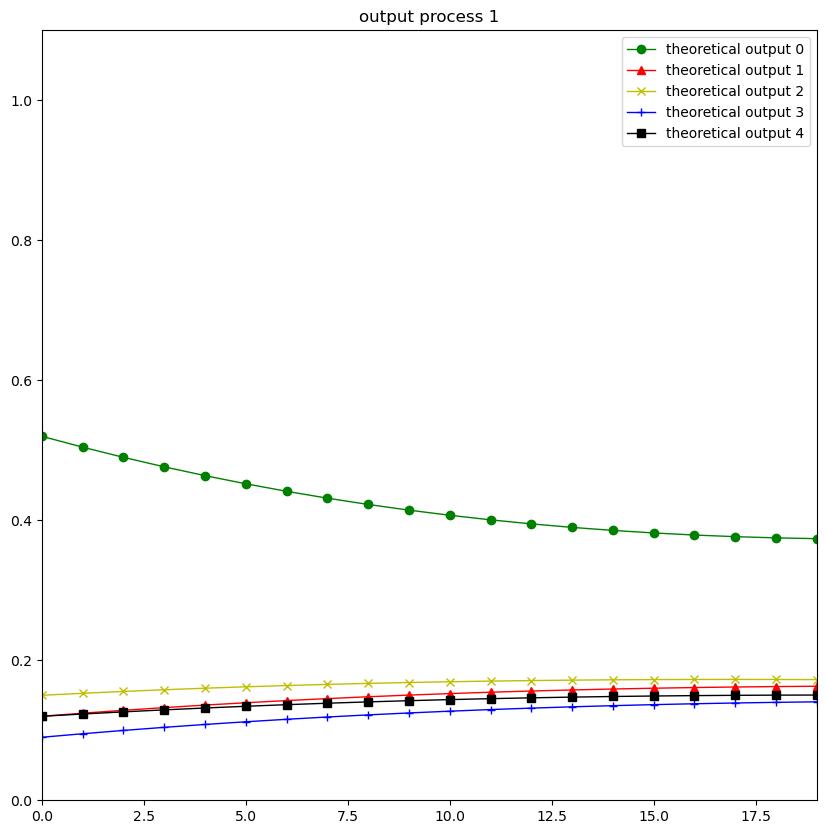

In [14]:
hsm.plot("Intensity", 1)

Emission probabilities

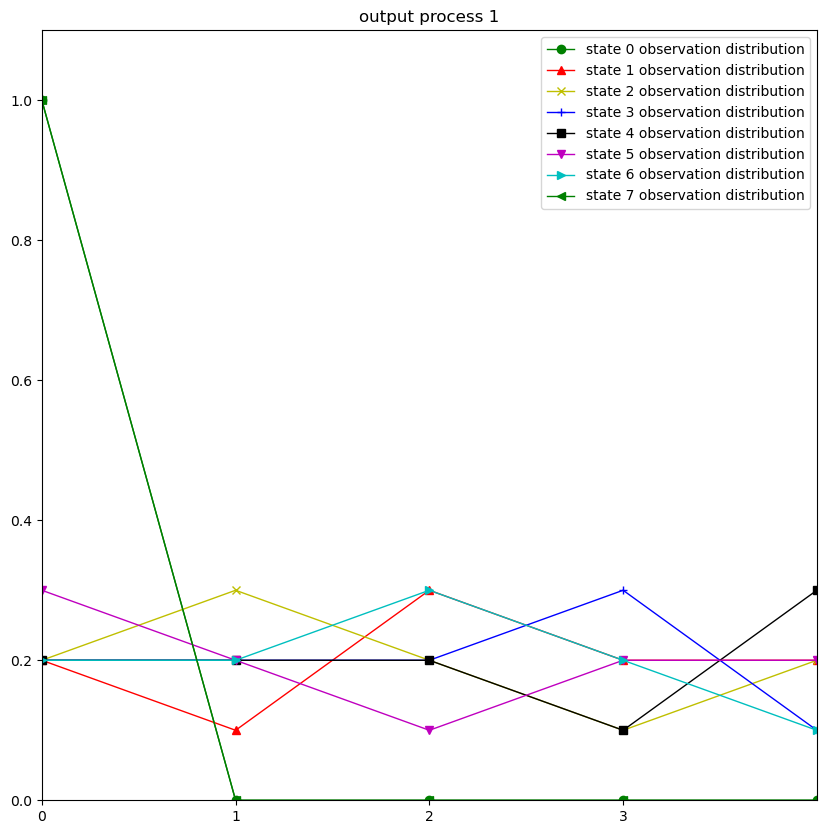

In [15]:
hsm.plot("Observation", 1)

Distributions of number of successive occurrences of values ("runs") and number of occurrences (not necessarily successive)

In [16]:
# Note that hsm.plot("Counting", 1)  replaces hsm.plot("NbRun", 1) and hsm.plot("NbOccurrence", 1)

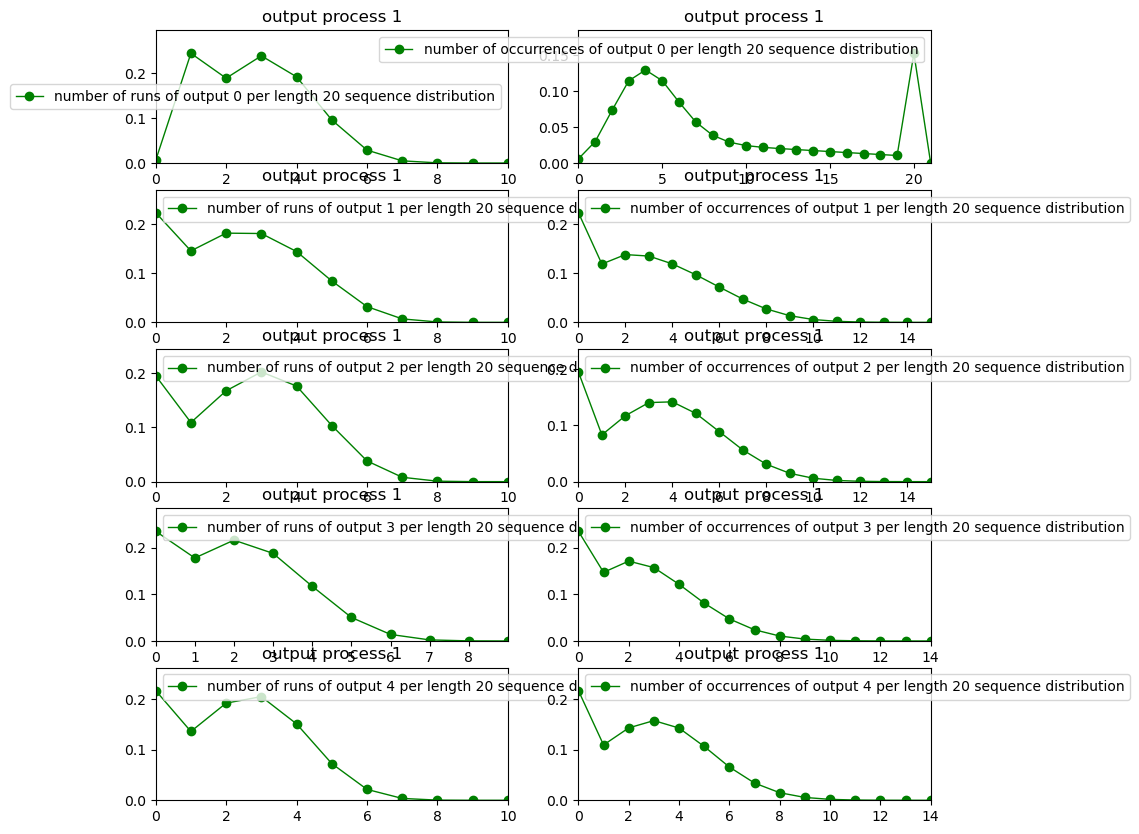

In [17]:
hsm.plot("Counting", 1)

Distributions of the number of time steps required to observe a value again once you just stopped observing it

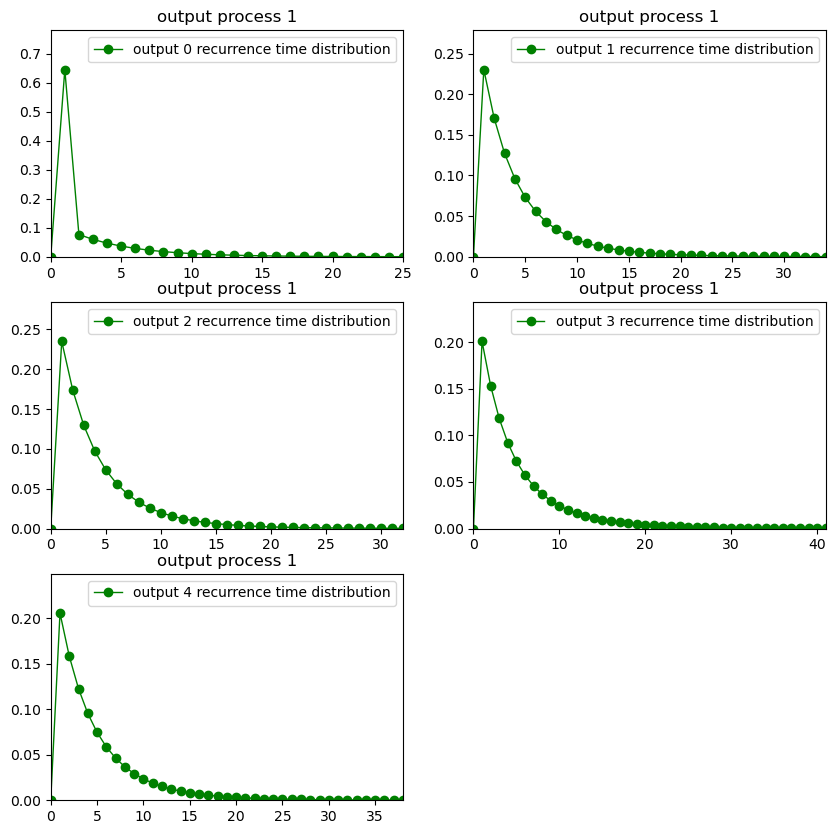

In [18]:
hsm.plot("Recurrence", 1)


Distributions of the number of time steps required to observe a value for the first time

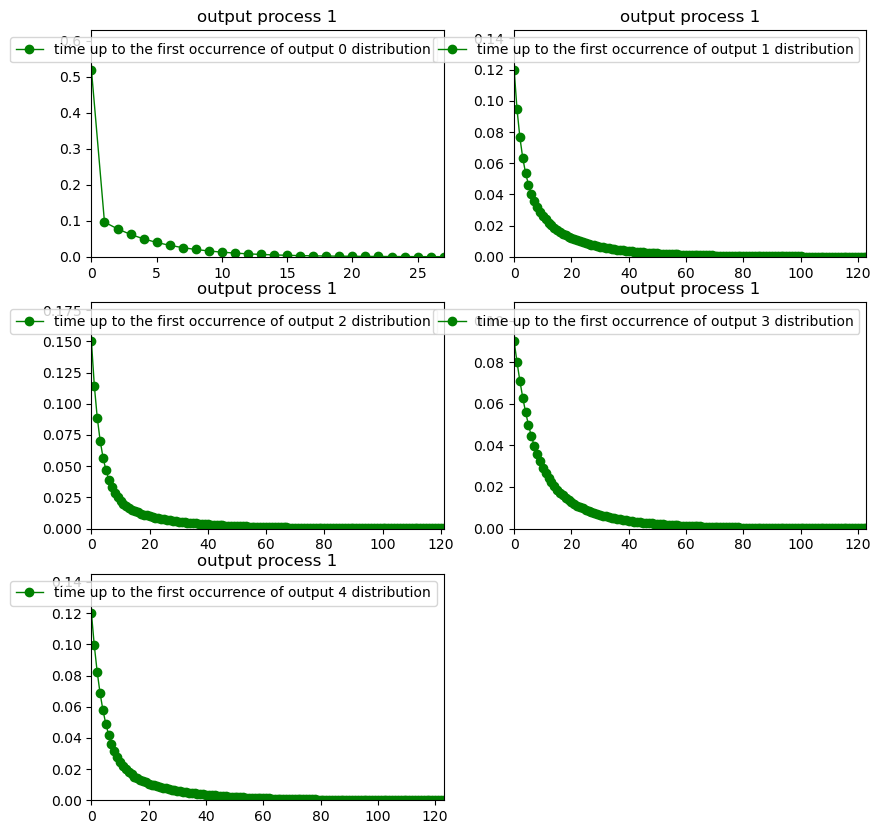

In [19]:
hsm.plot("FirstOccurrence", 1)

Distributions of the maximal number of successive occurrences of a same value

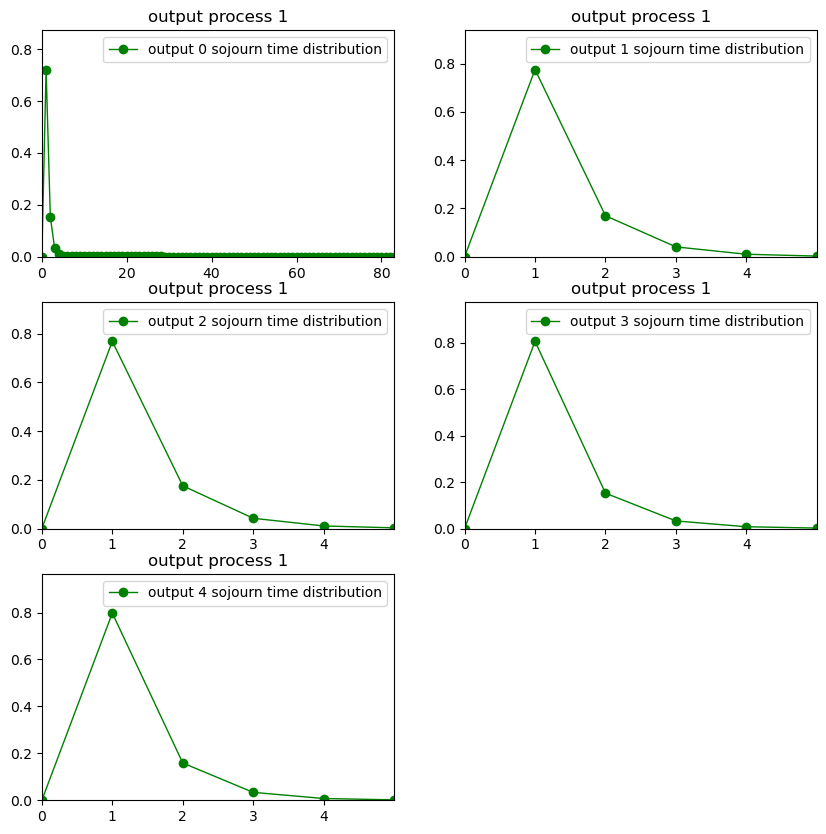

In [20]:
hsm.plot("Sojourn", 1)

In [21]:
# Would plot all above graph into a same figure, I do not recommend this.
# hsm.plot()

**Simulate sequences**

In [22]:
from openalea.sequence_analysis import Simulate

In [23]:
from openalea.stat_tool.distribution import set_seed
set_seed(0)

Simulate *nb_seq* sequences with length *seq_length*

In [24]:
nb_seq = 30
seq_length = 100
seq = hsm.simulation_nb_sequences(nb_seq, seq_length, True)
assert(len(seq) == nb_seq)
assert(len(seq[0]) == seq_length)
# NB: hsm has 1 output process but simulation includes the hidden state
assert(len(seq[0][1]) == 2)


N.o. initial states in parallel: 1


In [25]:
seq = hsm.simulation_nb_sequences(nb_seq, seq_length, True)


N.o. initial states in parallel: 1


In [26]:
# Print first simulated sequence.
# The first variable is the simulated state
print(seq[0])

[[1, 4], [1, 3], [1, 0], [1, 2], [1, 2], [1, 1], [1, 4], [1, 0], [1, 1], [1, 4], [1, 3], [1, 3], [1, 3], [1, 1], [1, 2], [1, 3], [1, 1], [1, 4], [1, 2], [1, 2], [1, 4], [1, 0], [1, 0], [1, 3], [1, 1], [1, 0], [1, 1], [1, 0], [1, 1], [1, 0], [1, 2], [1, 3], [1, 4], [1, 3], [1, 0], [1, 2], [1, 0], [1, 2], [1, 2], [1, 0], [1, 3], [1, 3], [1, 2], [1, 4], [1, 2], [1, 2], [1, 0], [3, 1], [3, 3], [3, 1], [3, 3], [6, 1], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0], [7, 0]]


Discard variable 1 (state)

In [27]:
obs = seq.select_variable([1], keep=False)

## Plotting marginal relative frequencies of data as a function of index

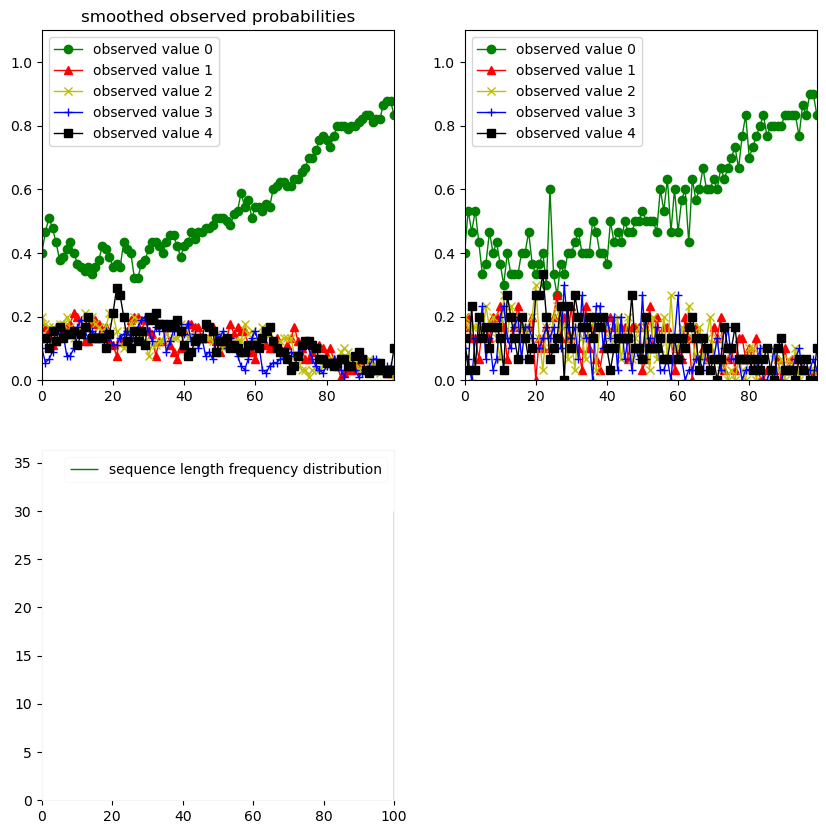

In [28]:
# Variable 1
obs.plot("Intensity", 0)

## HSCM re-estimation

### Reestimate from default initialisation

In [29]:
from openalea.sequence_analysis import Estimate
nb_states = 8

hsmc_est = Estimate(obs, "HIDDEN_SEMI-MARKOV", "Ordinary", nb_states, "LeftRight", Nbiteration=300)   
print(hsmc_est.display())

0
iteration 1   log-likelihood for the observed sequences: -4390.74
iteration 2   log-likelihood for the observed sequences: -3382.28
iteration 3   log-likelihood for the observed sequences: -3021.61
iteration 4   log-likelihood for the observed sequences: -2938.58
iteration 5   log-likelihood for the observed sequences: -2913.02
iteration 6   log-likelihood for the observed sequences: -2897.22
iteration 7   log-likelihood for the observed sequences: -2882.79
iteration 8   log-likelihood for the observed sequences: -2871.16
iteration 9   log-likelihood for the observed sequences: -2867.5
iteration 10   log-likelihood for the observed sequences: -2866.07
iteration 11   log-likelihood for the observed sequences: -2865.17
iteration 12   log-likelihood for the observed sequences: -2864.46
iteration 13   log-likelihood for the observed sequences: -2863.73
iteration 14   log-likelihood for the observed sequences: -2862.76
iteration 15   log-likelihood for the observed sequences: -2861.31
ite

## Plotting marginal relative frequencies of data and predicted probabilities as a function of index

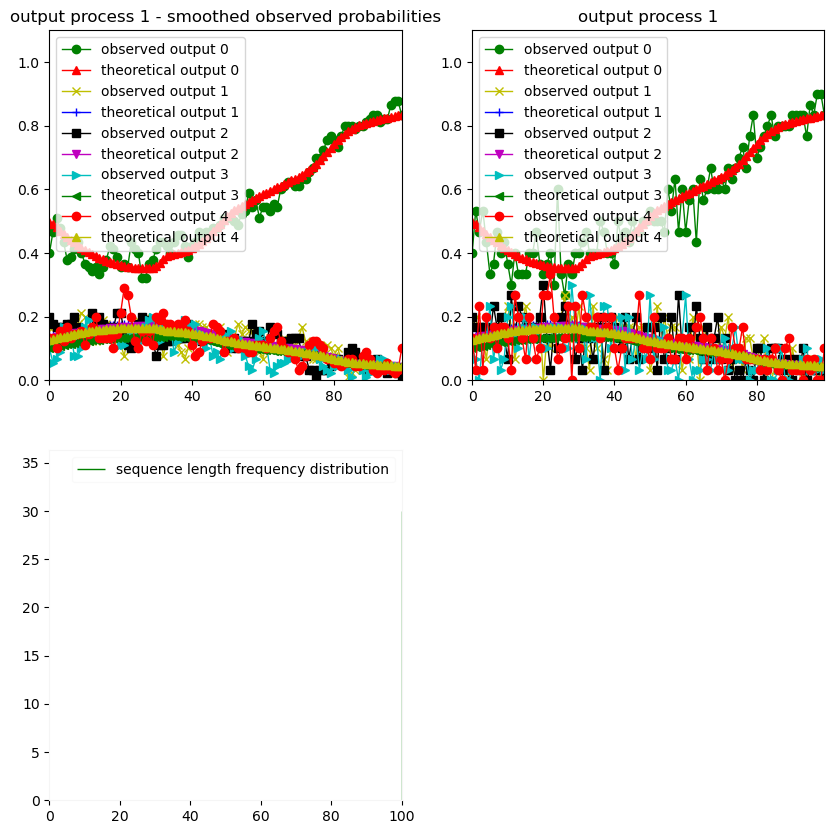

In [30]:
hsmc_est.plot("Intensity", 1)

## Observation (i.e., emission) distributions

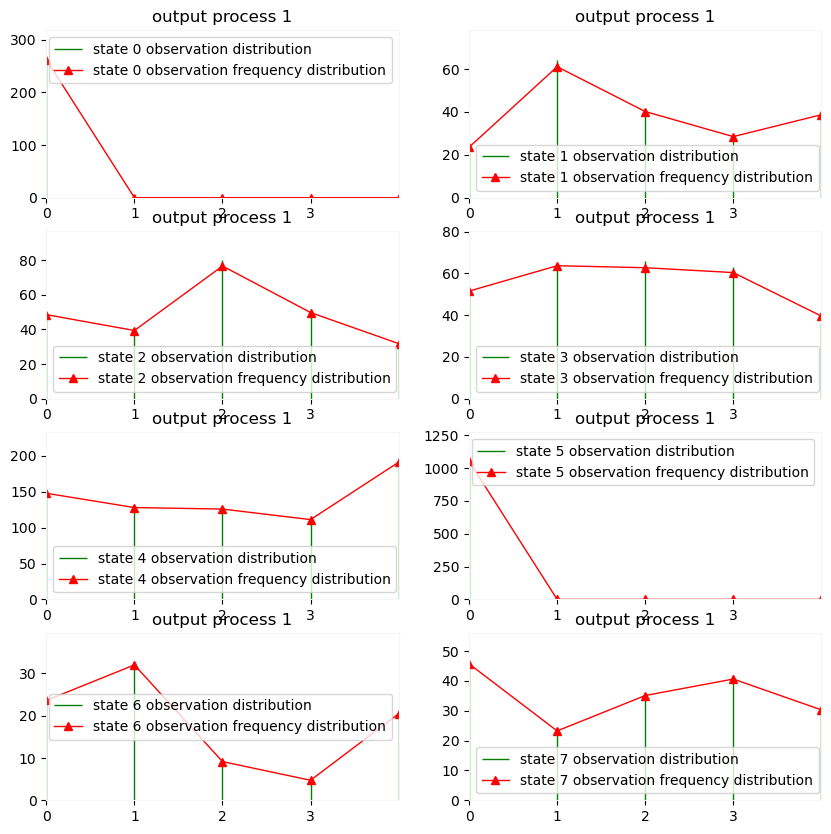

In [31]:
hsmc_est.plot("Observation", 1)


This continues as before: empirical and predicted statistics

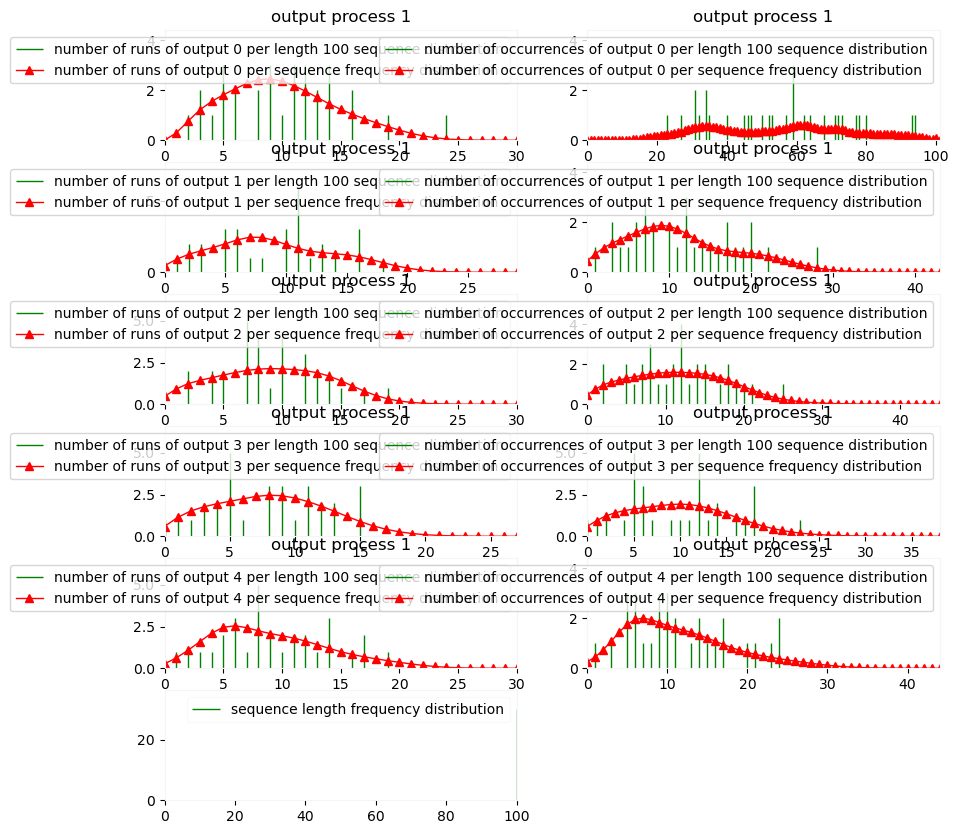

In [32]:
hsmc_est.plot("Counting", 1)


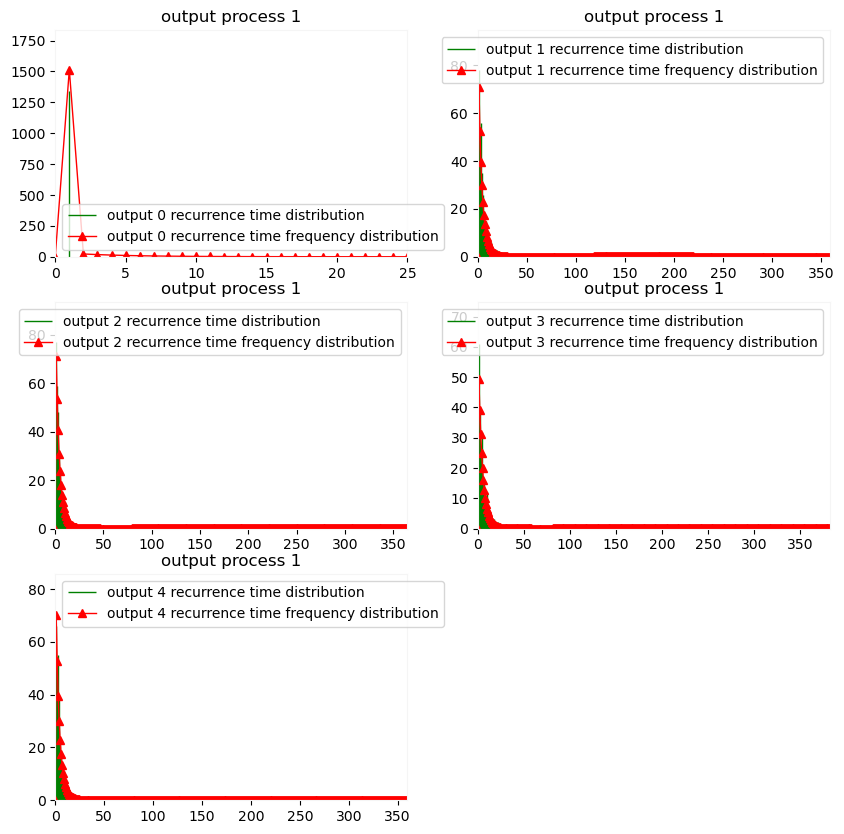

In [33]:
hsmc_est.plot("Recurrence", 1)


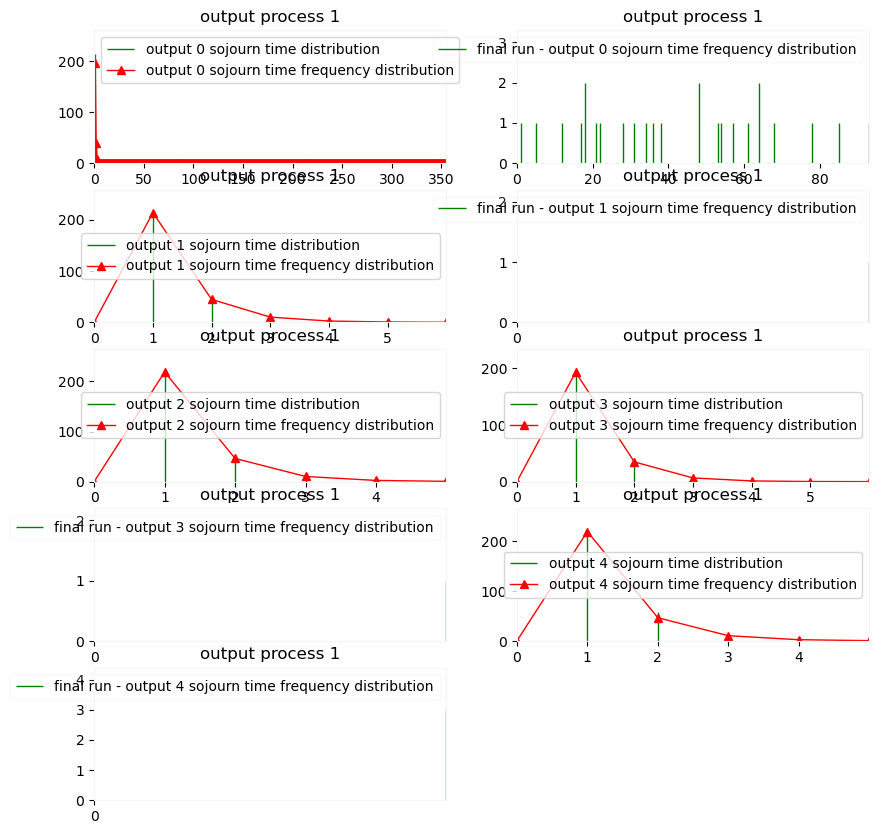

In [34]:
hsmc_est.plot("Sojourn", 1)


Note that you may also plot figures individually (and not as a collection of figures)

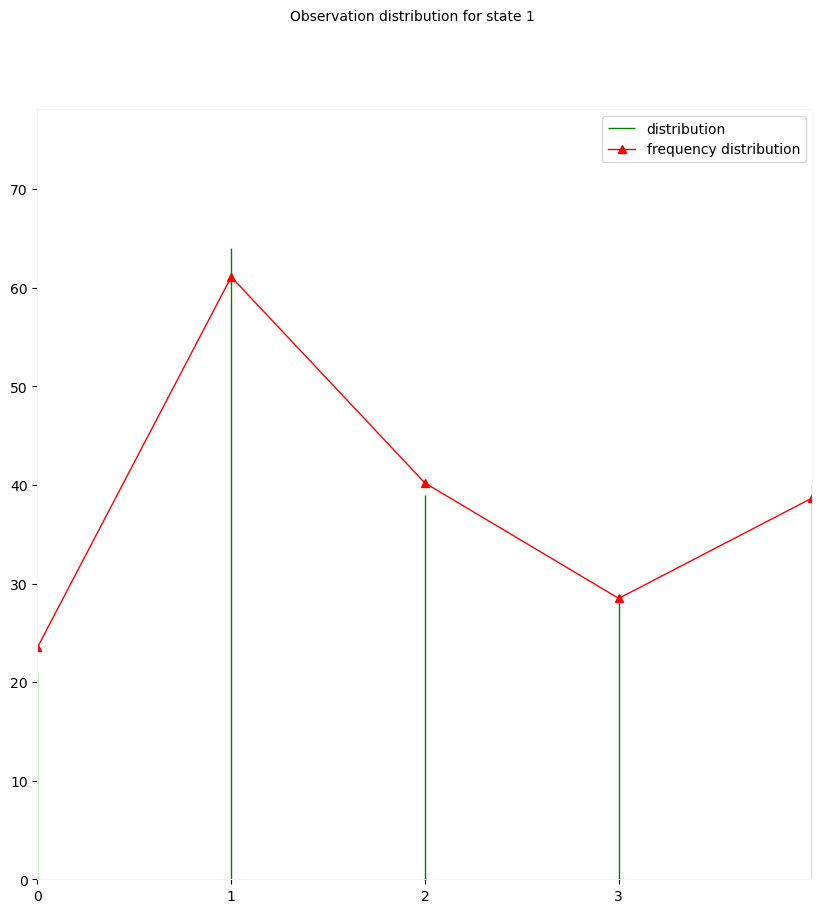

In [35]:
from openalea.sequence_analysis import seq_map
hsmc_est.extract(seq_map['Observation'],1,1).plot(Title="Observation distribution for state 1")

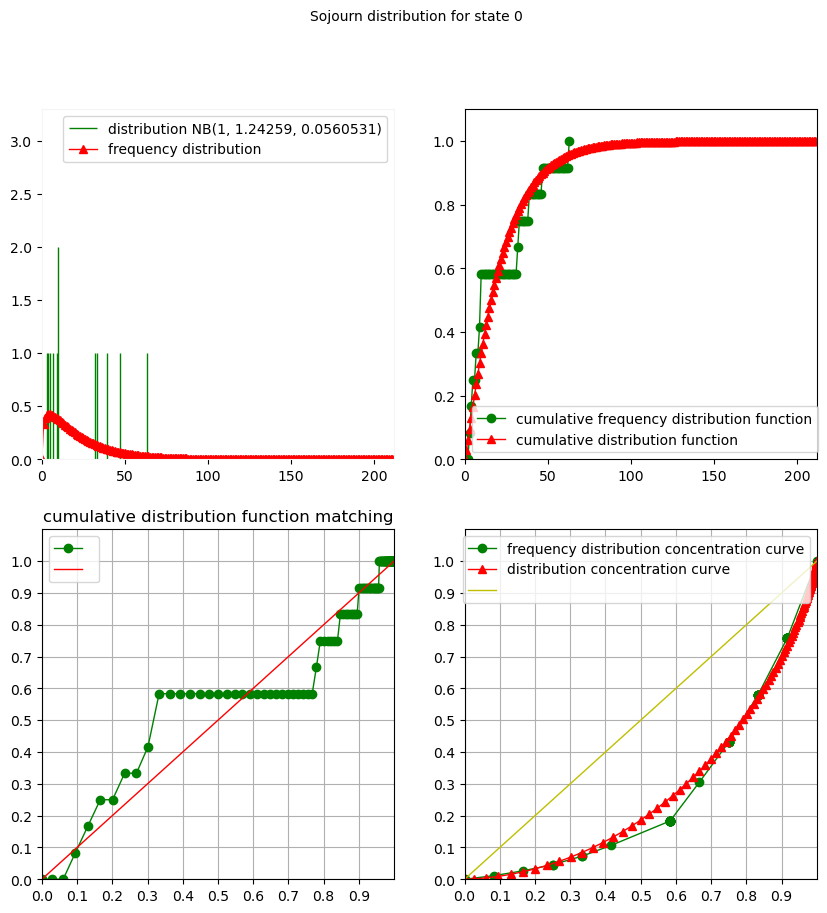

In [36]:
hsmc_est.extract(seq_map['Sojourn'],0,0).plot(Title="Sojourn distribution for state 0")

# Estimate HSMC with parametric emission distributions

In [37]:
model_file = "test_hidden_semi_markov_param.dat"

f = open(data_path + os.sep + model_file, "r")
f.close()

hsm = HiddenSemiMarkov(data_path + os.sep + model_file)

### Simulated model:

In [38]:
print(hsm)

HIDDEN_SEMI-MARKOV_CHAIN

3 STATES

INITIAL_PROBABILITIES
1    0    0    

TRANSITION_PROBABILITIES
0    0.8  0.2  
0.2  0    0.8  
0.8  0.2  0    

recurrent class: states 0 1 2

time up to the first occurrence of state 0 distribution
mean: 0   median: 0   mode: 0
variance: 0   standard deviation: 0

time up to the first occurrence of state 1 distribution
mean: 28.9851   median: 19   mode: 19
variance: 547.273   standard deviation: 23.3939   lower quartile: 18   upper quartile: 20

time up to the first occurrence of state 2 distribution
mean: 59.9053   median: 58   mode: 19
variance: 1044.37   standard deviation: 32.3167   lower quartile: 51   upper quartile: 64

state 0 recurrence time distribution
mean: 4.78015   median: 1   mode: 1
variance: 327.733   standard deviation: 18.1034   lower quartile: 1   upper quartile: 1

state 1 recurrence time distribution
mean: 2.21   median: 1   mode: 1
variance: 74.3382   standard deviation: 8.62196   lower quartile: 1   upper quartile: 1

state 

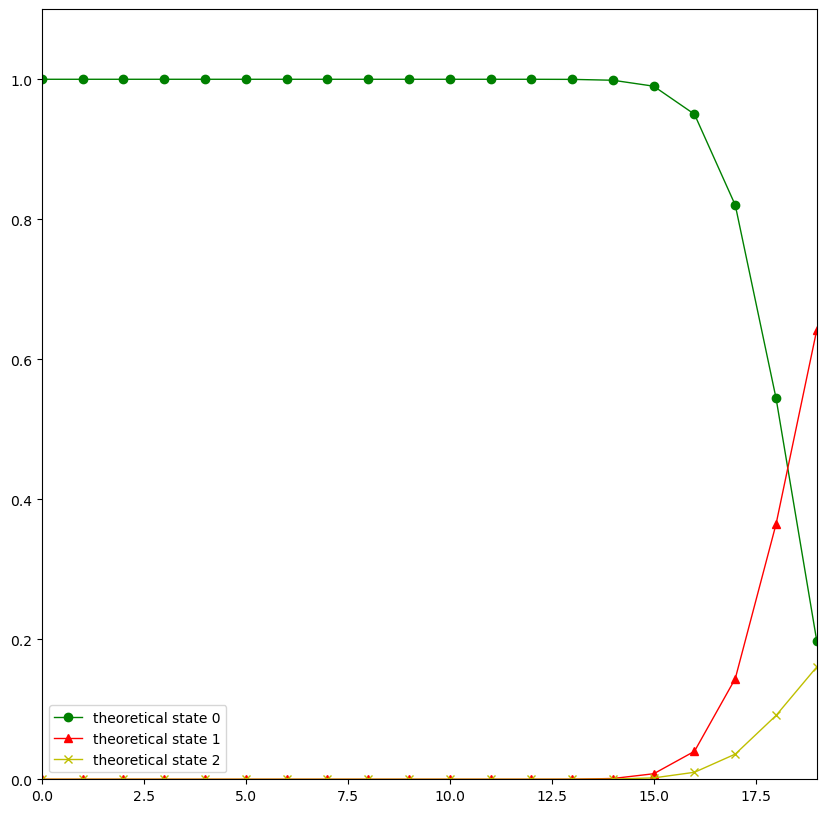

In [39]:
hsm.plot("Intensity", 0)  

In [40]:
set_seed(0)
nb_seq = 30
seq_length = 500
seq = hsm.simulation_nb_sequences(nb_seq, seq_length, True)
assert(len(seq) == nb_seq)
assert(len(seq[0]) == seq_length)
# NB: hsm has 1 output process but simulation includes the hidden state
assert(len(seq[0][1]) == 2)

nb_states = 3
obs = seq.select_variable([2], True)



N.o. initial states in parallel: 0

ERROR: 3 10.3294 16.1009

ERROR: 10 7.76323 5.10749

ERROR: 15 3.36213e-16 -1091.26

ERROR: 19 5.94737 5.77204


In [41]:
set_seed(0)
hsmc_est = Estimate(obs, "HIDDEN_SEMI-MARKOV", "Ordinary", nb_states, "Irreducible", Nbiteration=300)

0
iteration 1   log-likelihood for the observed sequences: -83418.3
iteration 2   log-likelihood for the observed sequences: -61605.1
iteration 3   log-likelihood for the observed sequences: -44917.8
iteration 4   log-likelihood for the observed sequences: -40171.1
iteration 5   log-likelihood for the observed sequences: -1e+37

 Convergence failed, returning saved model with highest likelihood

5 iterations

complete/censored state occupancy weights
state 0: 0, 0
state 1: 0, 0
state 2: 0, 0

N.o. initial states in parallel: 0

log-likelihood for the state sequences: -40172.3 | -40172.3

posterior state sequence probability
sequence 1: 0.990092
sequence 2: 0.817015
sequence 3: 0.985866
sequence 4: 0.986438
sequence 5: 0.984957
sequence 6: 0.996672
sequence 7: 0.983564
sequence 8: 0.987378
sequence 9: 0.975652
sequence 10: 0.589754
sequence 11: 0.985768
sequence 12: 0.990928
sequence 13: 0.982602
sequence 14: 0.984363
sequence 15: 0.984156
sequence 16: 0.98134
sequence 17: 0.993964
sequ

In [42]:
print(hsmc_est.display())

HIDDEN_SEMI-MARKOV_CHAIN

3 STATES

INITIAL_PROBABILITIES
1e-05        0.999973     1.70881e-05  

TRANSITION_PROBABILITIES
0            0.286123     0.713877     
0.807751     0            0.192249     
0.209932     0.790068     0            

recurrent class: states 0 1 2

time up to the first occurrence of state 0 distribution
mean: 27.0295   median: 18   mode: 15
variance: 706.904   standard deviation: 26.5877   lower quartile: 14   upper quartile: 25

time up to the first occurrence of state 0 frequency distribution - sample size: 30
mean: 24.3667   median: 18.5   mode: 18.5
variance: 304.24   standard deviation: 17.4425   lower quartile: 18   upper quartile: 19

time up to the first occurrence of state 1 distribution
mean: 0   median: 0   mode: 0
variance: 0   standard deviation: 0

time up to the first occurrence of state 1 frequency distribution - sample size: 0

time up to the first occurrence of state 2 distribution
mean: 56.9857   median: 51   mode: 49
variance: 1265.56   st

### Estimated emission distribution (state 0)

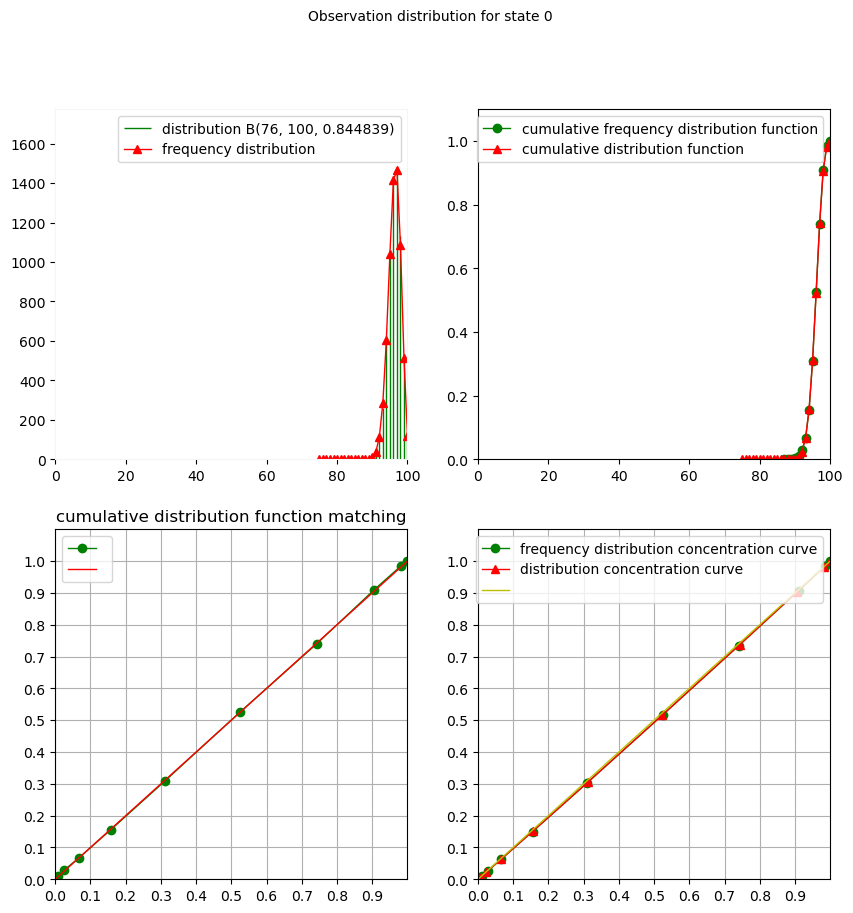

In [43]:
hsmc_est.extract(seq_map['Observation'],1,0).plot(Title="Observation distribution for state 0")

For the sake of comparison: associated true emission distribution

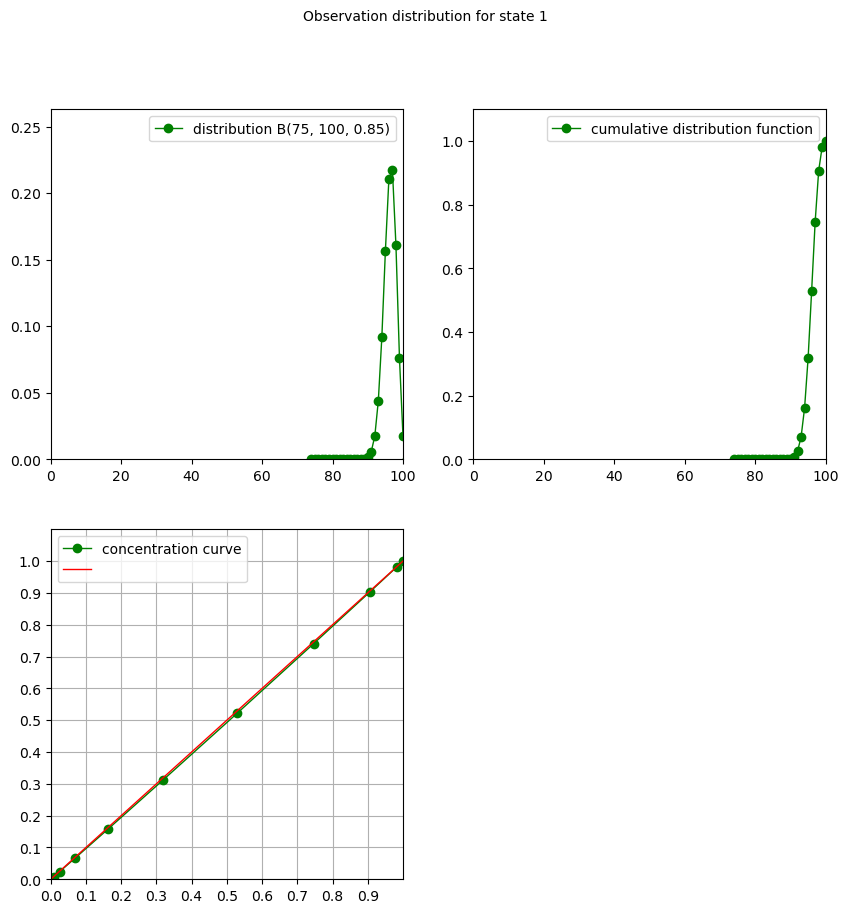

In [44]:
hsm.extract(seq_map['Observation'],1,1).plot(Title="Observation distribution for state 1")

### Estimated emission distribution (state 1)

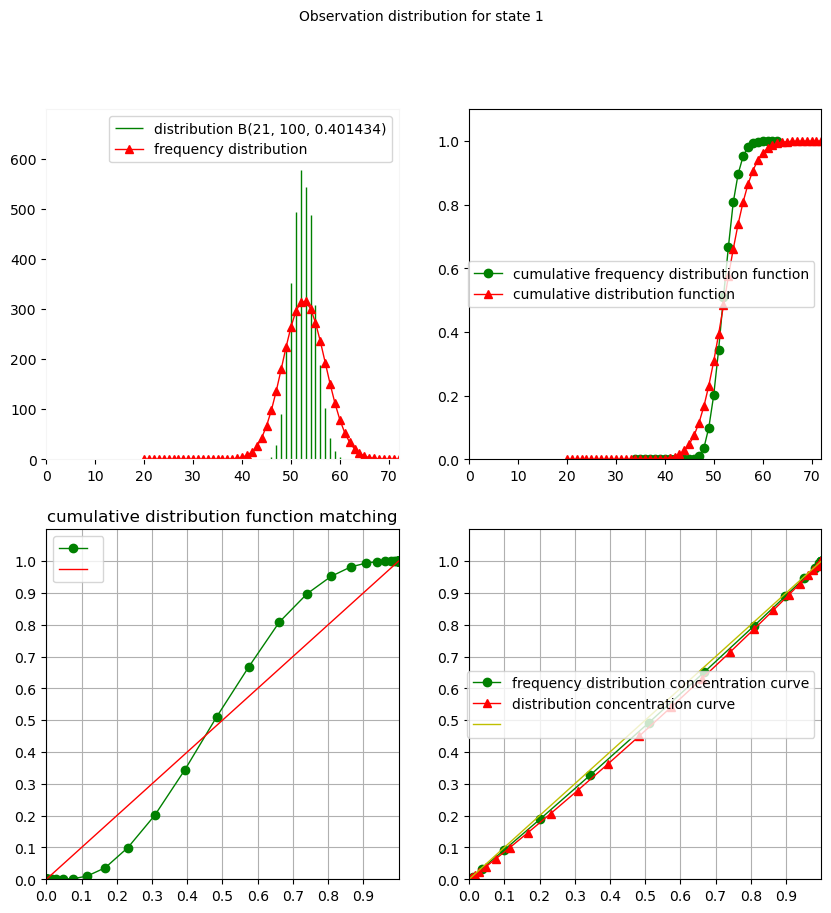

In [45]:
hsmc_est.extract(seq_map['Observation'],1,1).plot(Title="Observation distribution for state 1")

For the sake of comparison: associated true emission distribution

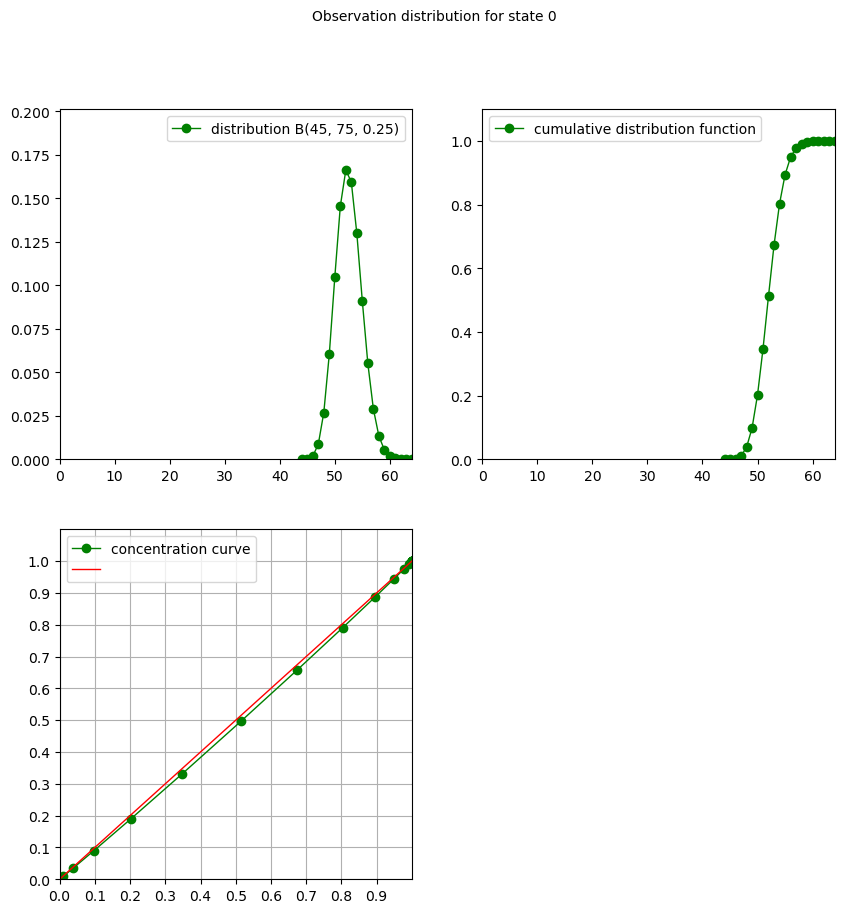

In [46]:
hsm.extract(seq_map['Observation'],1,0).plot(Title="Observation distribution for state 0")

### Estimated emission distribution (state 2)

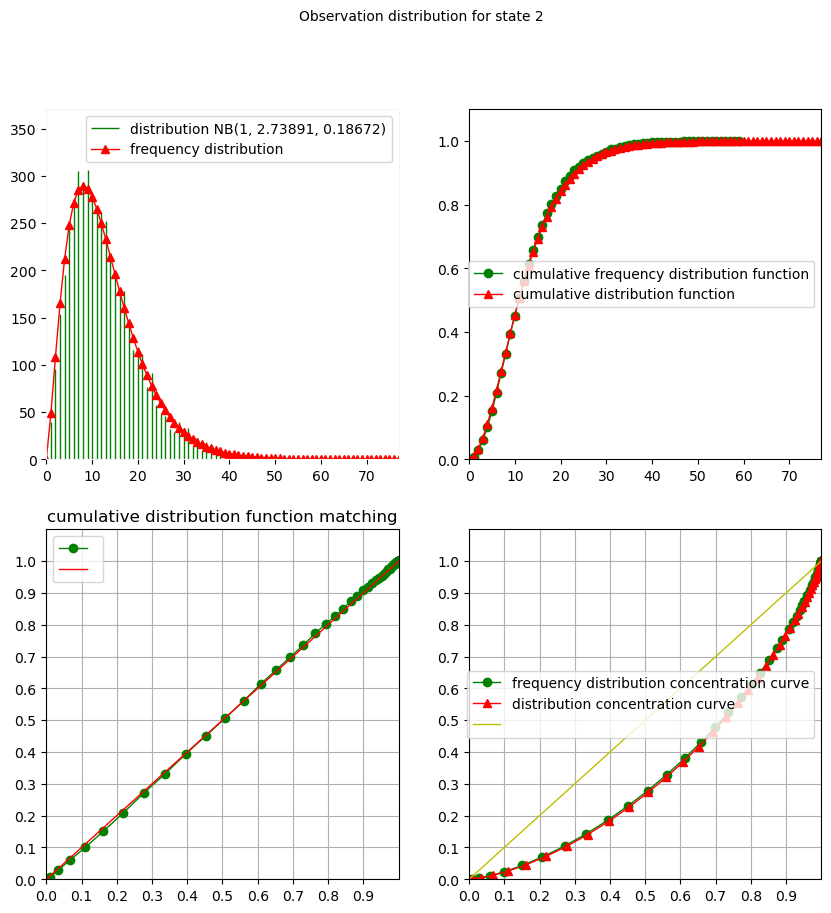

In [47]:
hsmc_est.extract(seq_map['Observation'],1,2).plot(Title="Observation distribution for state 2")

For the sake of comparison: associated true emission distribution

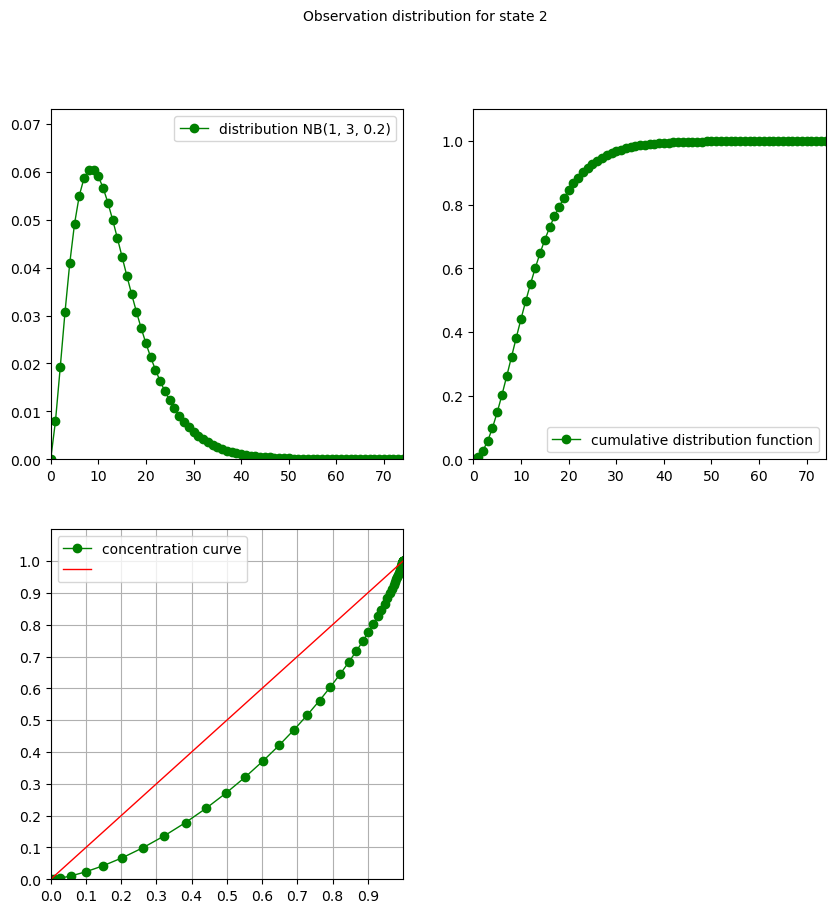

In [48]:
hsm.extract(seq_map['Observation'],1,2).plot(Title="Observation distribution for state 2")

# State restoration: Viterbi algorithm

In [49]:
restored = hsmc_est.state_sequence_computation(obs, True)


N.o. initial states in parallel: 0


Percentages of correct restoration per state value

In [50]:
# number of values in state 0
v0 = len([i for s in range(len(seq)) for i in range(len(seq[s])) if seq[s][i][0] == 0])
# number of values in state 0 with restored state 1
m0 = len([i for s in range(len(seq)) for i in range(len(seq[s])) if seq[s][i][0] == 0 and restored[s][i][0] == 1])
# number of values in state 1
v1 = len([i for s in range(len(seq)) for i in range(len(seq[s])) if seq[s][i][0] == 1])
# number of values in state 0 with restored state 1
m1 = len([i for s in range(len(seq)) for i in range(len(seq[s])) if seq[s][i][0] == 1 and restored[s][i][0] == 0])
# number of values in state 2
v2 = len([i for s in range(len(seq)) for i in range(len(seq[s])) if seq[s][i][0] == 2])
# number of values in state 2 with restored state 2
m2 = len([i for s in range(len(seq)) for i in range(len(seq[s])) if seq[s][i][0] == 2 and restored[s][i][0] == 2])
print((m0/v0, m1/v1, m2/v2))


(1.0, 1.0, 0.999587118084228)
